# Part 3: Trends in sea levels - class-wide results and peer feedback

## Assignment overview

* In Problem A you are guided through a set of coding tasks looking deeper into the sea level data.  

* In Problem B you will use results from Problem A and knowledge from the lectures on integration.

* Finally you will provide peer feedback on Parts 1, 2, following the instructions provided below.


You'll notice there are fewer coding problems in this assignment, because you also will need to complete the peer review part, described at the end.

Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", 
as well as your name(s) and group number in the cell below:

In [1]:
NAMES = "Carl Örnberg Jonathan Nguyen"                # fill in your name(s) between the quotes, comma separated if more than one
GROUP = "23"                # fill in your group number between the quotes

## Problem A

Class results on sea levels are in! If you want, you can check them out in this [online spreadsheet](
https://chalmers-my.sharepoint.com/:x:/g/personal/georgiap_chalmers_se/EUPggXeTGaJItdfHz0nHYDMBbaE5wrBIoFvFgGa9NGEp6Q?e=w2Zfon). (You'll need to log in with your Chalmers CID)

## A.1 Data exploration

Whenever one encounters a new dataset, it is a good idea to examine it. To make some simple plots to see if there are any quirks in the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# If using pandas run this cell
import pandas as pd
# Load the data collected by the class by running this cell.

df = pd.read_csv('collected_class_data.csv')

# converting the slopes column to numpy array (and similarly for the errors) may be easier for some
slopes = df['slope'].to_numpy()
slope_errs = df['slope_err'].to_numpy()

df

,group,stationID,longitude,latitude,slope,slope_err
0,88,155,-157.866667,21.306667,2.031778,0.221030
1,88,549,151.283333,-33.833333,40.470782,292.619919
2,88,53,5.320487,60.398046,318.561604,64.420237
3,28,1099,135.432778,34.658056,5.462886,124.194806
4,28,1103,141.685278,45.407778,2.514209,78.227526
...,...,...,...,...,...,...
301,134,2089,9.114000,39.210000,2.831783,0.709169
302,134,1442,145.568000,43.278000,10.704878,0.652691
303,111,386,88.040000,30.700500,5.450000,0.803000
304,111,1156,88.075000,30.250000,5.280000,0.380000


In [4]:
# If not using pandas run this cell

# read the first line of the data file
fop = open('collected_class_data.csv', 'r')
line = fop.readline()
fop.close()

# find the labels of the data columns
labels = line.strip('\n').split(',')

print(labels)

data = np.loadtxt('collected_class_data.csv', skiprows = 1, delimiter = ',' )

print(data.shape)

['group', 'stationID', 'longitude', 'latitude', 'slope', 'slope_err']
(306, 6)


#### Task 1: Find out how many unique stations did the class collect data for.

Print the number of unique stations as well as the total number of stations with collected data.

Hint: numpy's `np.unique` is useful for this task.

In [5]:
# YOUR CODE HERE
stations = df["stationID"]
station, counts = np.unique(stations, return_counts = True)



#### Task 2: In one figure, plot the distribution of the slopes from all stations in one panel and in the other panel plot the distribution of slope errors.

Hint: matplotlib pyplot `hist` may come in handy.

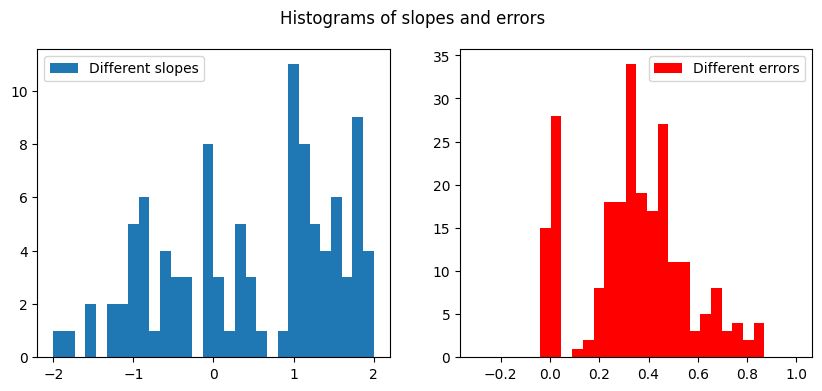

In [6]:
# YOUR CODE HERE
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Histograms of slopes and errors")
ax[0].hist(slopes, bins=30, range=(-2, 2), label="Different slopes")
ax[0].legend()
ax[1].hist(slope_errs, bins=30, range=(-0.3, 1), label="Different errors", color="red")
ax[1].legend()
plt.show()

#### Task 3: Remove bad data.

You will see that some slopes are extremely large in absolute value (hundreds or even thousands of mm/year). The same is true for some errors. 

These extreme values (also known as outliers) may be the result of error in the calculation, or the data of the chosen station in that case could be problematic. For example, in some stations the calibration of the data changed a few decades ago, leading to an apparent 'jump' in the sea levels that is not physical. 

Implement a criterion to keep only data with absolute value of slope < 100 mm/yr and absolute value of the slope error < 100 mm/yr. 

We will call these the 'clean' data. Prefer array indexing, avoid the use of a for loop.

Create two new 1d arrays, one containing the slopes and the other the slope errors. 

Hint: have you used `np.logical_and` before? Try it out.

In [7]:
# YOUR CODE HERE
slopes_bool = np.logical_and(slopes < 100, slopes > -100) #boolean array of correct values
slopes_clean = np.array(slopes[slopes_bool]) #"clean" array of values
errors_filt = np.array(slope_errs[slopes_bool]) #removing errors from the bad slopes
errors_bool_1 = np.logical_and(errors_filt < 100, errors_filt > -100) #cleaning bad slopes
errors_bool = np.logical_and(errors_bool_1, errors_filt !=0) #removing errors of zero to avoid getting division by zero
errors_clean = np.array(errors_filt[errors_bool]) #filtering data
slopes_clean = slopes_clean[errors_bool]

## A.2: Determining average sea level rise

#### Task 1: Compute the mean and weighted mean slope of the distribution of clean data from A.1, Task 3.

Using numpy functionality, compute the mean slope from the clean data. 

Using both the slope and error data (clean dataset) calculate the weighted mean slope.

Plot the distribution again with only the clean data slopes. Plot two vertical lines for the mean and weighted mean slope.

Hint: numpy's `average` can take as input weights to compute a weighted mean. The weights are just the inverse squared errors.

In [8]:
# YOUR CODE HERE
weights = 1/errors_clean**2
mean_weighted = np.average(slopes_clean, weights = weights)
mean_weighted

1.4578342399421185

#### Task 2: Compare to global mean sea level data.

Data from coastal stations are affected by local changes that don't necesarrily reflect the trend for the entirety of the Earth's seas. For example, near Onsala the ground is lifting upwards with respect to the sea level due to tectonic acivity. To uncover global trends, one needs to average out these regional changes.

Next we will compare the above results from your chosen local stations with data collected from all stations, showing the average height of the seas globally over time. The data were downloaded from this website: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level

First, run the following code block to read in and plot the global data. Note that the height data are given in inches, so we have to convert to mm.

Then, fit a straight line to these global data from the year 1980 onwards and plot the fitted line on the data.

Finally, compare the slope you get to the results from A.2, Task 1. Comment on what you find.

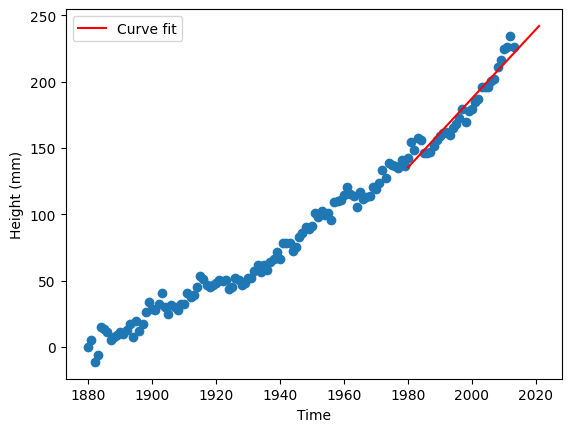

In [9]:
# Run this cell - you can modify/add code here if you wish

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp


# data downloaded from: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level

# The global data are given in inches. Convert to mm before plotting.
in_to_mm = 25.4

# --------
# If using pandas uncomment these lines:

#import pandas as pd
#global_data = pd.read_csv('sea-level_fig-1.csv', delimiter = ',', header = 6)

# Converting to numpy arrays which may be easier to handle for some
#time = global_data['Year'].to_numpy()
#height = global_data['CSIRO - Adjusted sea level (inches)'].to_numpy()*in_to_mm
# ------ 

# -----
# Use numpy to load the data. Exclude the first 6 rows and the last 8 rows (no data from CSIRO)
data = np.loadtxt('sea-level_fig-1.csv', delimiter = ',', skiprows = 7, usecols = [0,1], max_rows = 134)


time = data[:,0] # time in years is in the first column
height = data[:,1]*in_to_mm # height in inches is in the second column

# Plot the global data
plt.scatter(time, height)
plt.xlabel('Time')
plt.ylabel('Height (mm)')



# YOUR CODE HERE

slope, intercept, rvalue, pvalue, stderr = sp.stats.linregress(time[100:], height[100:])
x = np.linspace(1980, 2021, 200)
plt.plot(x, slope*x + intercept, label="Curve fit", color="red")
plt.legend()
plt.show()




#### Task 3: By how much has the average height of the seas increased since 1980?

The data include some scatter by seasonal variations and other factors. To estimate the height increase, prefer to use your fit in the previous task instead of the datapoints in the array of global heights.

If you are wondering where the rise comes from, check out: https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level
It is a combination of thermal expansion as the waters' temparature increases, and ice melting.

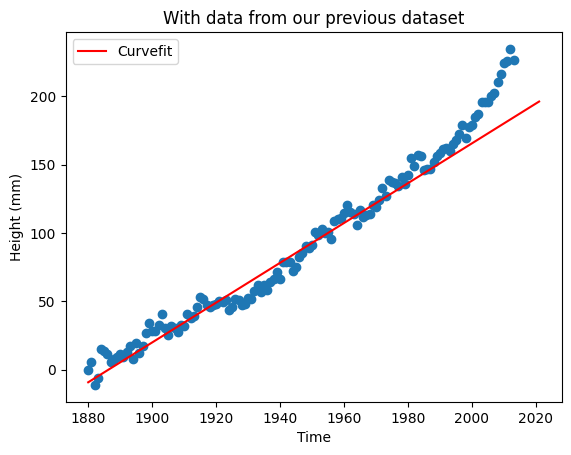

In [10]:
# YOUR CODE HERE
# Plot the global data
plt.scatter(time, height)
plt.xlabel('Time')
plt.ylabel('Height (mm)')

x = np.linspace(1880, 2021, 300)
mvalue = -2750 #we adjust to fit the line better to the data
plt.plot(x, x*mean_weighted + mvalue, label="Curvefit", color = "red")
plt.title("With data from our previous dataset")
plt.legend()
plt.show()

## B. Volume increase of Earth's seas

Given the rise in *global* sea levels seen in the data from  Problem A, your goal will be to estimate by how much the volume of the seas has increased in that same time interval (1980 - 2013). 

Use some form of numerical integration to solve the problem. The next sub-problems will guide you.


#### Task 1: Find the volume of a sphere the size of the Earth using numerical integration.

- Define a function that computes the surface of a sphere of radius `R`. You may start with the known formula for the surface of a sphere.

- Define a function that calculates the volume of a sphere by numerically integrating the surface of the sphere. Use any of the methods introduced in class for numerical integration (from the lecture notebook).  

- Use your functions to calculate the volume of a sphere with radius that of the Earth (R = 6371 km). Report your result in $km^3$.

In [11]:
# YOUR CODE HERE
def S(R):
    """Calculates area of a sphere"""
    return 4*np.pi*R**2

def Vol_S(S, R, n):
    """
    Calculates the volume of a sphere

    Input S - function that calculates the area of a sphere with radius R
    R - Radius
    n - number of points on interval

    return - Volume of a sphere
    """
    h = R / n
    Vol = 0
    r = 0                              # integration variable
    for i in range(n):
        r = i*h
        Vol += S(r)*h
    return Vol

Vol_earth = Vol_S(S, 6371, 152)
Vol_earth



1072540816881.1411

#### Task 2: Find the minimum value of intervals you need in the integration to get the correct answer from Task 1 to <a href=https://en.wikipedia.org/wiki/Approximation_error#Formal_Definition>relative error</a> of less than $10^{-2}$ =  1%.

Remember the definition of relative error: if $v$ is the correct answer and $v_{\rm approx}$ is the approximate answer, the relative error $\eta$ is defined as:

\begin{equation}
\eta = \left| \frac{v - v_{\rm approx}}{v} \right|
\end{equation}

If you choose to use a loop, it should have an "emergency exit" test that stops the loop if the number of intervals exceeds 1,000.

In [12]:
# YOUR CODE HERE
V_c = (4*np.pi*6371**3)/3
def error(Vol_S, V_c, rel_error=10**(-2), start_iterations = 10, max_iterations=1000):
    """
    Input - Vol_S - function that calculates volume of a sphere
    V_c - actual answer for the volume
    rel_error = minimum relative error (default=10^-2)
    start_iterations - the minimum iterations to test the relative error
    max_iterations - max number of intervals

    Return - appropriate intervals to adjust for the relative error
    """
    n = start_iterations
    while True:
        Vol = Vol_S(S, 6371, n)
        if abs((Vol-V_c)/Vol) < rel_error:
            break
        elif n > 1000:
            break
        n += 1
    return n

intervals = error(Vol_S, V_c)
intervals
    

152

#### Task 3: Find the volume of a spherical shell.

Define a function that calculates the volume of a spherical shell of thickness dR (the cross-section of such a shell is shown as an example below). Use your results from B, Task 1.

Assuming that (a) the seas cover 100\% of the Earth's surface, and (b) the average depth of the seas is 2.7 km, show that your function estimates the volume of sea water to be ~$1.3 - 1.4 \, \cdot 10^9 \,\, km^3$ ([ref](https://www.usgs.gov/special-topics/water-science-school/science/how-much-water-there-earth?qt-science_center_objects=0#qt-science_center_objects)).

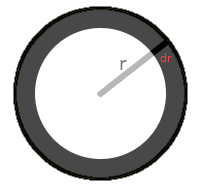

In [13]:
# YOUR CODE HERE
def Vol_dr(Vol, R, dr, n):
    """ 
    Input - Vol - function that calculates the volume of a sphere
    R - radius of sphere
    dr - thickness of spherical shell
    n - number of points on intervaö
    """
    return Vol(S, R, n)-Vol(S, (R-dr), n)

Vol_water = Vol_dr(Vol_S, 6371, 2.7, 1000)
Vol_water

1374526319.1938477

#### Task 4: Use your results from the previous tasks to estimate the increase in volume of the Earth's seas since 1980. 

For simplicity use the same assumptions as before, and that the volume at year 1980 was the one you found previously. This is a crude assumption, but good enough for our purposes.

Report your result both in absolute terms (i.e. the volume has increased by $km^3$) and as a percentage of the total initial volume.

In [14]:
# YOUR CODE HERE
Vol_2013 = Vol_dr(Vol_S, 6371, height[-1]*10**(-6), 1000) 
Vol_1980 = Vol_dr(Vol_S, 6371, height[100]*10**(-6), 1000)
increase = Vol_2013 - Vol_1980
percentage = Vol_2013 / Vol_1980
print("The volume has increased {:.2f} km^3 and in percentage {:.2f}".format(increase, percentage))



The volume has increased 42883.03 km^3 and in percentage 1.59
115305.4326171875
72422.40588378906


---

# Peer feedback

**Motivation and learning goals:**
    
An important part of learning how to program is to read and learn from others' code. As you evolve in your programming journey, you will find that you can not only *understand what code does*, but also start to find problems in the code and *opportunities for improvement*. This is an important stage in the learning process, allowing you to start to think beyond *'How can this be solved?'* to *'How could this be solved in a better way?'*. Combined with obtaining constructive feedback *on your own code* this is a proven strategy to quickly improve the way you program.

What we expect from you for this part of the assignment:

* Give feedback that is constructive: write feedback in a way that can help the group who wrote the code to improve.  
* A good rule of thumb is to aim to spend between 15 - 30 minutes for each notebook you give feedback on.
* Aim to give at least one useful suggestion that you think the other group would appreciate.
* You can answer most questions with Yes/No, except for the ones which ask for an example. Write at least one sentence for the latter type of question.
* If you see something in the code that you particularly liked, write that down - the group will probably be pleased to hear what they did extremely well.
* You are free to write short code snippets as suggestions if you want, but remember we do not require you to debug code that does not work.
* If your feedback is found to have inappropriate/rude language, or if there are no examples in the required questions, you will be asked to revise it and resubmit.

The assignments will be graded as usual by the teachers and TAs. Your feedback will be sent to each group by us, anonymizing who gave the feedback.

**What your feedback should contain (rubric):**

You should answer the following questions in your peer review:

*Readability*

* Is the code easy to understand? Does it have enough comments that help you follow its logic?

* Are the figures clear?

*Accuracy*

* Does the code run without producing errors? 

* Are the results reasonable? Did you find any mistakes in the implementation?

*Comparison to own approach*

* Was the implementation similar to your own? 

* How was the implementation different than yours? Write an example or two.

*Overall strengths*

* What part of the code did you find was done well? Write at least one example (could be a clear figure, a smart use of array indexing etc).

*Suggestions for improvement*

* How could this code be improved with respect to readability, accuracy or efficiency? Write at least one example.

**Practical Instructions:**

* Download the two notebooks that your group was assigned to give feedback on
* In each notebook, create a new markdown cell in the top of the notebook
* Title the markdown cell: '# Feedback'
* Copy-paste the above rubric into that cell
* Read the code of the notebook, run it and inspect the output
* Discuss in your team what to answer for the questions in the rubric
* Add your answers/comments into the top cell
* Submit these two notebooks where you have added feedback along with your submission of this problem set notebook as usual on Canvas.
